In [6]:
import pandas as pd
import numpy as np
import os
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

from  matplotlib import pyplot as plt
import random
import tensorflow as tf
import os
from PIL import Image
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.image as mpimg
%matplotlib inline

In [27]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\data\CV\Intel_Images\seg_train\seg_train'

In [11]:
import matplotlib.image as mpimg

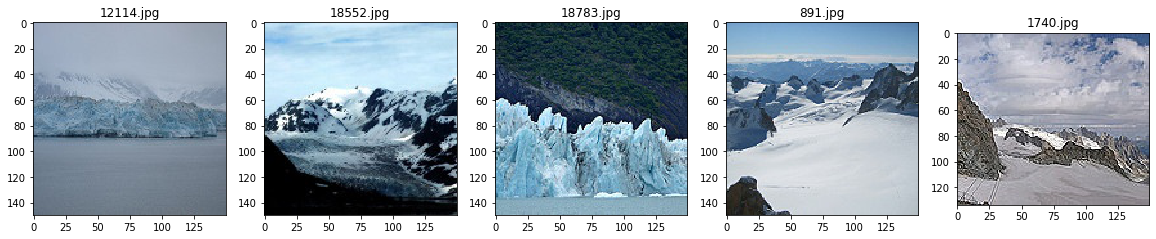

In [12]:

test_folder=r'C:\data\CV\Intel_Images\seg_train\seg_train\glacier'

plt.figure(figsize=(20,20))


for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [18]:
def create_dataset_PIL(img_folder):
    
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            image = image.astype('float32')
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name      


In [19]:
PIL_img_data, class_name=create_dataset_PIL(img_folder)

In [ ]:

print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

In [22]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [25]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [28]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(200, 200, 3)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(6)])



In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 921990    
Total params: 941,382
Trainable params: 941,382
Non-trainable params: 0
_________________________________________________________________


In [31]:
df=pd.DataFrame()
df['label'] = target_val

In [33]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [35]:

history = model.fit(x=tf.cast(np.array(PIL_img_data),tf.float64), y=tf.cast(list(map(int,target_val)),tf.int32), epochs=2)


Train on 14034 samples
Epoch 1/2
14034/14034 [==============================] - 68s 5ms/sample - loss: 11.1774 - accuracy: 0.1789
Epoch 2/2
14034/14034 [==============================] - 63s 5ms/sample - loss: 11.1905 - accuracy: 0.1790


In [117]:
model.save('rmsprop_cv2_array.h5')

In [191]:
history = model.fit(x=np.array(PIL_img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=2)


Train on 3091 samples
Epoch 1/2
3091/3091 [==============================] - 52s 17ms/sample - loss: 12.0283 - accuracy: 0.1909
Epoch 2/2
3091/3091 [==============================] - 51s 17ms/sample - loss: 12.0283 - accuracy: 0.1909
